In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plot characteristics
title_font_size = 15
font_size = 12
tick_size = 10
plt.rc('figure', titlesize = title_font_size)
plt.rc('axes', labelsize = font_size)
plt.rc('axes', titlesize = font_size)
plt.rc('xtick', labelsize = tick_size)
plt.rc('ytick', labelsize = tick_size)

# What is... Linear Regression?

!["Endless Possibilities"](https://images.unsplash.com/photo-1583990994634-8f6db946236a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=800&q=80)
*Fig. 1: Learning linear regression unlocks the potential to learn more complicated techniques and concepts.*

When I asked my mentor how to prepare for data science interviews, he recommended that I focus on understanding various machine learning models, the first of which being the linear regression algorithm. It makes sense that he’d recommend me to do so. Many data scientists and machine learning engineers regard this algorithm as the first step towards becoming a professional in the field. It serves as the base for which we can develop a deeper understanding for more complex models.

## Overview of Linear Regression 
But, what actually is it? From Wikipedia, we see that the algorithm entails, “a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables)”. In other words, **the linear regression algorithm simply uses a line to model the relationship between the independent (predictor) variables and dependent (response) variable**. From this, we can make predictions for future observations. 

How does it look mathematically? Think back to your high school algebra teacher, and recall that one lesson where he or she was talking about the equation of a line. You’ll recall that the equation of a line looks like this: 

$$Y = mX + b$$ 

This is what the linear regression model looks like: 

$$Y = \beta_0 + \beta_1 \cdot X$$ 

Here:
- $Y$ is the dependent variable. This is the variable we are trying to predict.
- $\beta_0$ is the slope intercept. If there were no value for $X$ i.e. $X = 0$, then $Y$ would be this number.
- $\beta_1$ is the slope coefficient. For every unit increase in $X$, $Y$ is changed by this much.
- $X$ is the independent variable. This is the variable that helps us predict $Y$.

Notice that it’s the exact same formula because the model itself is a line, it's just the variables are different.

There could be many values for $\beta_0$ and $\beta_1$. However, we are only interested in the values that give us the line that best fits the data.
With this in mind, we can see that the linear regression algorithm attempts to **find the line that best fits the data by optimizing the coefficients $\beta_0$ and $\beta_1$**.

Of course, there are still many other questions to answer. How do I get the best values? Can there be more variables? When and how can I use it? Why should I use it? I will go more in-depth into these questions below, starting with when to use it. 

## When would you use it?
### Assumptions
There are several assumptions when using linear regression. These are:

- **Normality**

We assume that all variables are normally distributed. This helps us use other statistical methods in the future. 

- **Linearity**

Linearity is just as it sounds: we assume there is a linear relationship between the predictor variable and response variable.
This isn’t always the case with real data, but regardless, linear regression can still be as effective as other more complex models.

- **Constant variance of the residuals**

Variance refers to the measurement of spread between numbers, and residuals are calculated as the actual value minus the predicted value i.e. the error.
So, we assume that the variance in the errors of the response variables stays relatively the same throughout all values of each of the predictor variables. 

In other words, no matter the value for X, we get the same spread in errors for Y. This is called *homoscedasticity*.

Why is this important? 

Let’s think of what happens when this isn’t the case, which is called heteroscedasticity. It would be difficult to create a regression model when heteroscedasticity is present, as there’d be great variety in the independent variable. A cone shape would form from plotting a scatterplot of this independent variable, and this cone shape would make it difficult to fit a line.

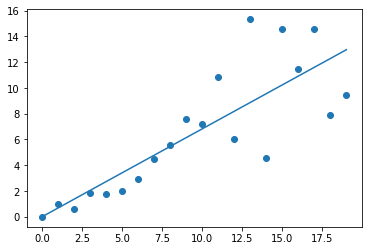

In [2]:
np.random.seed(1)
X = np.arange(20)
Y = [x * 0.3 + np.random.rand(1) * x for x in range(20)]  
plt.scatter(X, Y)

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m * X + b)

plt.show()

*Fig. 1: Graph showing heteroscedasticity. A model will have difficulty fitting to this data. You might get consistent predictions from low X-values, but your predictions will vary much more as X increases.*


- **Little to no multicollinearity**

Multicollinearity is the idea that predictor variables are correlated with each other. We assume that there exists little to no correlation between the predictor variables.

### In what situations would you use it?
Personally, I use this algorithm as a baseline to compare other models to. For example, if I were to predict housing prices, I would start off by using a linear regression model to predict prices, even though it’s not reasonable to assume that the data itself is linear. If the linear regression model performs just as well as some other, more complex model, then why would you use more complicated models if the simplest one performs just as well?

## How do you optimize the coefficients?

The best way to explain any new concept is through examples. Suppose we have a [dataset](https://github.com/FeezyHendrix/LinearRegressionfromscrath) containing the size of a person’s head and the weight of their brain, and we want to predict a new person’s brain weight, measured in grams, given their head size, measured in cm$^3$. We can do this using linear regression, where the independent variable $X$ is head size and the dependent variable $Y$ is brain weight. Let's see what the data looks like.

In [3]:
df = pd.read_csv('data/dataset.csv')
X = df['Head Size(cm^3)']
Y = df['Brain Weight(grams)']

df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590



### Cost Function

In order to use linear regression, we need to come up with a line of best fit. In order to find the line of best fit, we need to come up with the best values for $\beta_0$ and $\beta_1$. How would we do this? 

First, recall that the linear regression model for our example looks like this: 

$$Brain Weight = \beta_0 + \beta_1 \cdot Head Size$$ 

Let’s visualize what the line of best fit might look like in our dataset. Note that these lines are **dummy lines**, meaning that I used coefficients that looked like it might fit the data. This is done purely for demonstrative purposes.

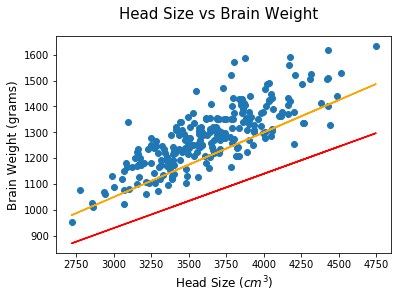

In [49]:
plt.scatter(X, Y)

# Use random coefficients for illustration
dummy_reg_line_1 = 0.25 * X + 300
dummy_reg_line_2 = 0.21 * X + 300
plt.plot(X, dummy_reg_line_1, color = 'orange')
plt.plot(X, dummy_reg_line_2, color = 'r')

plt.suptitle("Head Size vs Brain Weight")
plt.xlabel('Head Size ($cm^3$)')
plt.ylabel('Brain Weight (grams)')

plt.show()

Above, we can see that the orange line seems to be a better fit than the red line. 

Why is this line better? Because it's closer to all of the data points. Thus, our goal is to find the line that **best minimizes the error between the predicted values and the actual values**.

This goal can be represented mathematically as the **cost function $J$**.

$$J = \frac{1}{n}\sum_{i = 1}^{n}(pred_i - y_i)^{2}$$

*Fig.1: Our goal is to minimize $J$*.

Let's step through this equation, starting from the right.

- $pred_i$ represents our model's prediction for the $i^{th}$ observation. This is influenced by $\beta_0$ and $\beta_1$.

- $y_i$ is the actual value for the $i^{th}$ observation.

- $(pred_i - y_i)^{2}$ calculates the error, or residual, between our predictions and the actual value of the $i^{th}$ observation. We square it because we can end up with negative values, which can affect our summation.

- $\sum_{i = 1}^{n}(pred_i - y_i)^{2}$ adds up all of the residuals.

- $\frac{1}{n}\sum_{i = 1}^{n}(pred_i - y_i)^{2}$ divides that sum by the total number of observations $n$.

In the end, we end up calculating the **mean squared error** of all observations. This overall process is called Ordinary Least Squares (OLS).

Now that we know *what* to optimize, *how* do we optimize it?

### Gradient Descent

One method to get the best values for $\beta_0$ and $\beta_1$ is gradient descent. 

Gradient descent updates the coefficients in order to reduce our cost function $J$, starting at some initial value that we choose. 
In order to use it, we must take gradients of $J$ by taking the partial derivatives with respect to $\beta_0$ and $\beta_1$. 

$J$ can be rewritten in terms of our coefficients, like so:

$$J = \frac{1}{n}\sum_{i = 1}^{n}(\beta_0 + \beta_1 \cdot x_i - y_i)^{2}$$

Then, we have to take the partial derivatives with respect to $\beta_0$ and $\beta_1$.

$$\frac{\partial J}{\partial \beta_0} = \frac{2}{n}\sum_{i = 1}^{n}(\beta_0 + \beta_1 \cdot x_i - y_i)$$

$$\frac{\partial J}{\partial \beta_1} = \frac{2}{n}\sum_{i = 1}^{n}(\beta_0 + \beta_1 \cdot x_i - y_i) \cdot x_i$$

Now that we have these partial derivatives, we can compute new values for $\beta_0$ and $\beta_1$.

$$\beta_0 = \beta_0 - \alpha \cdot \frac{\partial J}{\partial \beta_0}$$

$$\beta_1 = \beta_1 - \alpha \cdot \frac{\partial J}{\partial \beta_1}$$

You might notice the $\alpha$ symbol. This is our learning rate, which controls how fast we get to the optimal coefficient. Larger values converge quicker but can potentially “overshoot” the minima, whereas lower values can get us to the minima but slower. Typically, I use 0.1 as my $\alpha$.

You can decide how many times you want to run gradient descent, and either run it a certain number of times or until the coefficients stop updating by a certain amount.

### Closed Form Solution

Since the linear regression algorithm is guaranteed to converge, we can also calculate the coefficients using the closed-form solution.

This is the formula:

$$\beta = (X^TX)^{-1}X^Ty$$

- $\beta$ is a vector of our coefficients.
- $X$ are our features in matrix form.
- $y$ is a vector of our response variable.

This is a very easy way to compute the coefficients. However, this method is not always reliable because it can become very expensive to compute if your data has lots of features. Also, this closed form solution doesn't work for most nonlinear regression problems. As such, gradient descent is used more often.

### Multiple Linear Regression

You can, of course, add more variables to this model. The dataset we're using has another column called `Gender`. I could easily make a multiple linear regression model that looks like: 

$$Y = \beta_0 + \beta_1 \cdot Head Size + \beta_2 \cdot Gender$$

#### Interaction Terms
Now suppose that we have an interaction between head size and gender. In other words, head size has a different impact on brain size depending on whether or not the person is male or female.

This would result in a model that looks like: 

$$Brain Weight = \beta_0 + \beta_1 \cdot Head Size + \beta_2 \cdot Gender + \beta_3 \cdot (Head Size \cdot Gender)$$ 

There are now three coefficients, with the $\beta_3$ term being the **interaction term**.

With an interaction term, it's more complicated to answer the question “how much does a person’s brain weigh” as now, we have to also consider whether or not we are talking about a male or a female.

How does this all work out mathematically? Assume that for every male we have, their gender in the `Gender` column is recorded as 1. For every female, it's recorded as 2.

Now, suppose that we want to predict the brain weight of a new male’s head i.e. `Gender` = 1. Our model becomes: 

$$Y = \beta_0 + \beta_1 \cdot Head Size + \beta_2 \cdot 1 + \beta_3 \cdot (Head Size \cdot 1)$$ 

$$Y = \beta_0 + \beta_1 \cdot Head Size + \beta_2 + \beta_3 \cdot Head Size$$ 

Observe that $Y$ is being affected by $\beta_0 + \beta_1 + \beta_2 + \beta_3$.

Now, let's predict the brain weight for a female i.e. `Gender` = 2:

$$Y = \beta_0 + \beta_1 \cdot Head Size + \beta_2 \cdot 2 + \beta_3 \cdot (Head Size \cdot 2)$$ 

$$Y = \beta_0 + \beta_1 \cdot Head Size + 2\beta_2 + 2\beta_3 \cdot Head Size$$

The models are different! For every unit increase of head size for a male, the brain weight changes by $\beta_0 + \beta_1 + \beta_2 + \beta_3$. 

But for females, every unit increase of head size means the brain weight changes by $\beta_0 + \beta_1 + 2\beta_2 + 2\beta_3$. You can see that, depending on the gender, head size has a different effect on brain weight.

Interaction terms are an important concept for linear regression models, as they allow us to expand upon the relationship between $X$ and $Y$ in our dataset, and allows us to have a deeper understanding of what’s going on in the data.

## Coding it 

Now that I've explained what linear regression is and how it works, let's actually code it using `statsmodels`, a Python package that'll help us with estimating the coefficients. With `statsmodels`, we can calculate $\beta_0$ and $\beta_1$ in two lines of code.

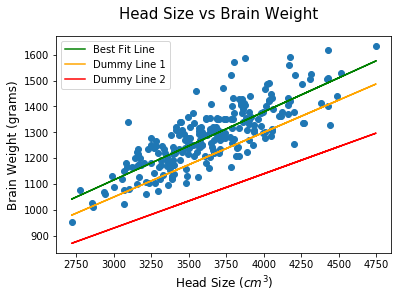

In [50]:
import statsmodels.api as sm

model = sm.OLS(Y, (sm.add_constant(X)))
results = model.fit()

plt.scatter(X, Y)

plt.plot(X, results.fittedvalues, 'g', label = 'Best Fit Line')
plt.plot(X, dummy_reg_line_1, 'orange', label = 'Dummy Line 1')
plt.plot(X, dummy_reg_line_2, 'r', label = 'Dummy Line 2')

plt.xlabel("Head Size ($cm^3$)")
plt.ylabel("Brain Weight (grams)")
plt.suptitle("Head Size vs Brain Weight")
plt.legend()

plt.show()

We see that the green line, which used the coefficients that `statsmodels` calculated, is a much better fit of the data than the dummy lines from earlier. 

In fact, `statsmodels` allows us to look deeper into the regression results, such as the p-value.

In [6]:
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Brain Weight(grams)   R-squared:                       0.639
Model:                             OLS   Adj. R-squared:                  0.638
Method:                  Least Squares   F-statistic:                     416.5
Date:                 Wed, 10 Jun 2020   Prob (F-statistic):           5.96e-54
Time:                         08:11:37   Log-Likelihood:                -1350.3
No. Observations:                  237   AIC:                             2705.
Df Residuals:                      235   BIC:                             2711.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             325.5734     4

### Interpreting your results

The above table shows the values that `statsmodels` calculated for $\beta_0$ and $\beta_1$, which are 325.573 and 0.263, respectively.

This means that **for every unit increase in head size, brain weight changes by 0.263 grams**.

The p-value also tells us if there is a significant effect of head size on brain weight. The p-value is used in hypothesis testing, and if the p-value is less than some prior significance level $\alpha$, then there is a significant effect of the independent variable on the dependent variable.

A common $\alpha$ value to use is 0.5. The p-value in the table is very small, which is why it's 0. So, we can conclude that there is a significant effect of head size on brain weight.

### $R^2$
Another important statistic to look at is $R^2$. This value captures the proportion of variance in the dependent variable that can be explained by our model. Mathematically, it looks like:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

$$SS_{res} = \sum_{i}(y_i - pred_i)^2$$

$$SS_{tot} = \sum_{i}(y_i - \bar{y})^2$$

$$\bar{y} = \frac{1}{n}\sum_{i = 1}^{n}y_i$$

$R^2$ is the sum of residual squares $SS_{res}$ divided by the total sum of squares $SS_{tot}$, which is proportional to the variance of the data. $\bar{y}$ represents the mean of the response variable. 
Using $\bar{y}$ means that $R^2$ is a relative measure of fit. Instead of explicitly measuring how well the model performs, we compare its performance around the mean $\bar{y}$. 

The higher $R^2$ is, the more the model can explain all of the variability in the dependent variable, and the closer the data is to the line. On the other hand, if it’s 0, then the model explains no variability, and so it doesn't fit the data well. 

In this example, we see that it is around 0.63, meaning that about 63% of the variance in the data is explained by the green regression line.  

## Coding it from scratch

For fun, let's implement the linear regression algorithm from scratch using the `numpy` package.

### Using the Closed Form Solution

Recall that the closed form solution is: $$\beta = (X^TX)^{-1}X^Ty$$

In [7]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

N = len(X)

b0 = np.ones(X.shape[0]).reshape(N, 1)
X_mat = np.hstack((b0, X.reshape(N, 1)))
A = np.dot(X_mat.transpose(), X_mat) # (X^TX)
B = np.dot(X_mat.transpose(), Y.reshape(N, 1)) # X^Ty
betas = np.dot(B.transpose(), np.linalg.inv(A))

print("Coefficients from Closed Form Solution:")
print("Y = %.2f + %.2fX" % (betas[0, 0], betas[0, 1]))

Coefficients from Closed Form Solution:
Y = 325.57 + 0.26X


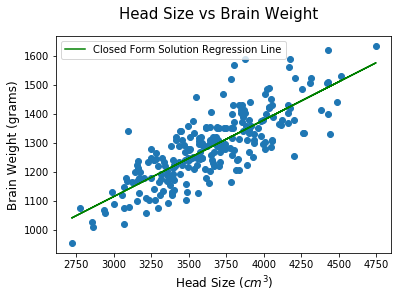

In [8]:
plt.scatter(X, Y)

plt.plot(X, betas[0, 0] + betas[0, 1] * X, 'g', label = 'Closed Form Solution Regression Line')

plt.xlabel("Head Size ($cm^3$)")
plt.ylabel("Brain Weight (grams)")
plt.suptitle("Head Size vs Brain Weight")
plt.legend()

plt.show()

This is close to what `statsmodels` calculated!

### Using Gradient Descent

Now, let's do the same thing but using gradient descent.

In [10]:
"""
Calculates the cost function.
"""
def cost_function(preds, Y, N):
    return (1/N) * sum((preds - Y)**2)

# Init. coefficients to arbitrary values
b_0 = 0
b_1 = 0

# Define the learning rate alpha
alpha = 0.000000001
epochs = 1000

N = float(len(X))

for i in range(epochs):
    # Make predictions
    preds = b_0 + b_1 * X
    residuals = preds - Y
    
    # Partial derivative wrt b0, b1
    D_b_0 = (2/N) * (sum(residuals))
    D_b_1 = (2/N) * (sum(residuals * X))

    b_0 = b_0 - alpha * D_b_0 # Update b0
    b_1 = b_1 - alpha * D_b_1 # Update b1
    
print("Coefficients from Gradient Descent:")
print("Y = %.3f + %.3fX" % (b_0, b_1))

Coefficients from Gradient Descent:
Y = 0.000 + 0.352X


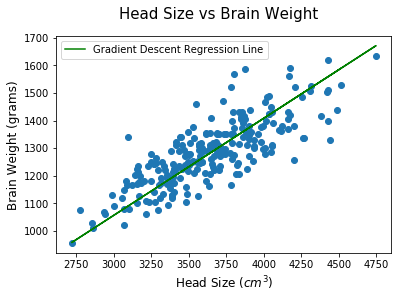

In [14]:
plt.scatter(X, Y)

plt.plot(X, b_0 + b_1 * X, 'g', label = 'Gradient Descent Regression Line')

plt.xlabel("Head Size ($cm^3$)")
plt.ylabel("Brain Weight (grams)")
plt.suptitle("Head Size vs Brain Weight")
plt.legend()

plt.show()

Though this model has different coefficients, the regression line still looks to be a pretty good fit of the data.

In order to get reasonable values, I had to lower the learning rate by quite a bit. Using typical values like 0.001 would be too large, and so my gradient descent would "overshoot" the minima.

## Other ways to evaluate a Linear Regression Model
Once you have a model, how can we actually determine that we have the line of best fit? How can we evaluate its performance? We've already looked at one way, which was $R^2$. Another evaluation metric we can use is the Root Mean Squared Error.

### Root Mean Squared Error

The Root Mean Squared Error is just as it sounds. First, you get the average of all your residuals squared in your dataset, then you get the square root of it. 

$$RMSE = \sqrt{\frac{1}{n}\sum_{i= 1}^{n}(y_i - pred_i)^2}$$

Lower values indicate a better fit. Whereas $R^2$ used $\bar{y}$, we are explicitly measuring how well our model makes predictions. Thus, RMSE is an absolute measure of fit, and is also more widely used. If you want your model to be as good as it can be in making predictions, then use RMSE as your evaluation metric.

Let's go ahead and compare the three regression lines from earlier using $R^2$ and RMSE.

In [85]:
"""
Calculates the RMSE of the given model.
"""
def calc_rmse(preds, Y, N):
    return np.sqrt(np.mean((preds - Y)**2))


"""
Calculates R^2 of the given model.
"""
def calc_R2(preds, Y, N):
    y_hat = np.mean(Y)
    ss_res = sum((preds - Y)**2)
    ss_total = sum((Y - y_hat)**2)
    
    return 1 - (ss_res / ss_total)


# statsmodels line
statsmodels_line = results.params[0] + results.params[1] * X

# Closed form solution line
cfs_line = betas[0, 0] + betas[0, 1] * X

# Gradient descent line
grad_desc_line = b_0 + b_1 * X

N = len(X)


print("Statsmodels Line\n \tR^2: %.3f\n \tRMSE: %.3f" % (calc_R2(statsmodels_line, Y, N), calc_rmse(statsmodels_line, Y, N)))
print("Closed Form Solution Line\n \tR^2: %.3f\n \tRMSE: %.3f" % (calc_R2(cfs_line, Y, N), calc_rmse(cfs_line, Y, N)))
print("Gradient Descent Line\n \tR^2: %.3f\n \tRMSE: %.3f" % (calc_R2(grad_desc_line, Y, N), calc_rmse(grad_desc_line, Y, N)))

Statsmodels Line
 	R^2: 0.639
 	RMSE: 72.121
Closed Form Solution Line
 	R^2: 0.639
 	RMSE: 72.121
Gradient Descent Line
 	R^2: 0.566
 	RMSE: 79.102


| Model                | $R^2$ | RMSE   |
|----------------------|-------|--------|
| Statsmodels          | 0.639 | 72.121 |
| Closed Form Solution | 0.639 | 72.121 |
| Gradient Descent     | 0.566 | 79.102 |



The `statsmodels` line and the closed form solution line performs best. It's expected that the closed form solution performs well because it is able to calculate the coefficients in "one-shot". The gradient descent line is performing poorly for many reasons. One can be that there are various optimizations going on underneath the hood when `statsmodels` computes the coefficients. 

## Why use Linear Regression

By now, you should have a more in-depth understanding as to what linear regression is, how it works, when you can use it, and how it can be used. Now, I'll explain *why* you'd want to use it.

### Pros
Perhaps the greatest strength of the linear regression algorithm is its simplicity. As I showed earlier, it's both easy to understand and implement. It also allows us to interpret the coefficients, and allows us to see how much the predictor variables affect the response variable. Even if it performs poorly, we can still use the model to determine the nature of the relationship, as well as a baseline for other models to compare to.

### Cons
This simplicity is also a huge flaw. In most real-world cases, the relationship between $X$ and $Y$ won’t be linear. The linear regression algorithm won’t pick up on this, or any of the other complexities within the data.
Linear regression is also highly sensitive to outliers, meaning the line will be “pulled” towards those outliers to try and minimize the distance to them.

I hope this blog gives you a better understanding of linear regression. Though it is simple to understand, there is a lot that goes underneath the hood, and getting a grasp of those concepts will help you immensely in understanding more complicated models.